In [1]:
import pandas as pd
import numpy as np
from numpy import ravel
from numpy import unique
from numpy import transpose
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5JE66pQB1KJItYr2QUVldTeOGDUfgWwV8u5VdmGkkm6fjZgwCU0-owOzBFakl_aYfsF2aL6xNxRwc/pub?gid=161992597&single=true&output=csv"
colmns = ["name", "date", "freq_sum", "market", "t"]

data = pd.read_csv(url, usecols = colmns)
unique_items = data.loc[:, "name"].unique()
data['freq_sum_log10'] = np.log10(data['freq_sum'])
data['market_log10'] = np.log10(data['market'])
#data_ = data[(data.loc[:, "name"] != 'Серебро') & (data.loc[:, "name"] != 'Сырая нефть')]
data_ = data.copy(deep = True)

На всех данных (без исключения коммодов)

0.015817716624768385

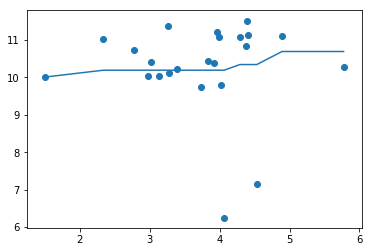

In [3]:
from sklearn.isotonic import IsotonicRegression

iso_model = IsotonicRegression(out_of_bounds='clip')
data2017 = np.array(
    data_[data_['t'] == 20]
        .loc[:, ['freq_sum_log10', 'market_log10']]
        .sort_values(by='freq_sum_log10'))
X_2017 = data2017[:, 0]
y_2017 = data2017[:, 1]
iso_model.fit(X_2017, y_2017)
plt.plot(X_2017, iso_model.predict(X_2017))
plt.scatter(X_2017, y_2017)
r2_score(y_2017, iso_model.predict(X_2017))

На данных с `На данных с iloc[9:,]`

0.04568299750814475

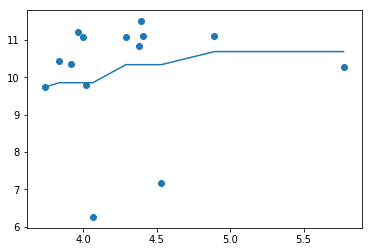

In [4]:
from sklearn.isotonic import IsotonicRegression

iso_model = IsotonicRegression(out_of_bounds='clip')
data2017 = np.array(data_[data_['t'] == 20].
                    loc[:, ['freq_sum_log10', 'market_log10']].
                    sort_values(by='freq_sum_log10').
                    iloc[9:,])
X_2017 = data2017[:, 0]
y_2017 = data2017[:, 1]
iso_model.fit(X_2017, y_2017)
plt.plot(X_2017, iso_model.predict(X_2017))
plt.scatter(X_2017, y_2017)
r2_score(y_2017, iso_model.predict(X_2017))

На данных с отбором

In [5]:
data_2 = data[(data.loc[:, "name"] != 'Серебро') & (data.loc[:, "name"] != 'Сырая нефть')]

In [6]:
data_2.sort_values(by='freq_sum_log10')

,name,date,t,freq_sum,market,freq_sum_log10,market_log10
64,Арахисовое масло,2002,5,2,8015933565,0.301030,9.903954
62,Арахисовое масло,2000,3,2,7388859185,0.301030,9.868577
63,Арахисовое масло,2001,4,4,8469893835,0.602060,9.927878
20,Кокосовое масло,1998,1,5,3091766871,0.698970,9.490207
69,Арахисовое масло,2007,10,6,12037908567,0.778151,10.080551
60,Арахисовое масло,1998,1,6,8675010644,0.778151,9.938270
61,Арахисовое масло,1999,2,6,7352635712,0.778151,9.866443
23,Кокосовое масло,2001,4,7,1712177612,0.845098,9.233549
67,Арахисовое масло,2005,8,8,11282124688,0.903090,10.052391
24,Кокосовое масло,2002,5,9,1962368755,0.954243,9.292781


Скор выше, но сами значения, которые может дать модель, большие

0.27851011470888887

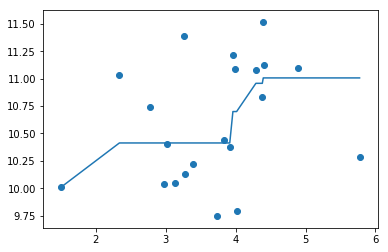

In [7]:
from sklearn.isotonic import IsotonicRegression

iso_model = IsotonicRegression(out_of_bounds='clip')
data2017 = np.array(
    data_2[data_2['t'] == 20]
        .loc[:, ['freq_sum_log10', 'market_log10']]
        .sort_values(by='freq_sum_log10'))
X_2017 = data2017[:, 0]
y_2017 = data2017[:, 1]
iso_model.fit(X_2017, y_2017)
plt.plot(X_2017, iso_model.predict(X_2017))
plt.scatter(X_2017, y_2017)
r2_score(y_2017, iso_model.predict(X_2017))

Linear regression

In [8]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

Вывод statsmodels позволяет сказать, насколько хорошо модель описывает данные. Предиктор статистически значим

In [9]:
mod = sm.OLS(y_2017, X_2017)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     358.0
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           3.11e-14
Time:                        19:56:35   Log-Likelihood:                -48.542
No. Observations:                  21   AIC:                             99.08
Df Residuals:                      20   BIC:                             100.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7262      0.144     18.920      0.0

In [10]:
data2017

array([[ 1.50514998, 10.00986872],
       [ 2.33845649, 11.03433244],
       [ 2.78103694, 10.73882974],
       [ 2.9740509 , 10.03624233],
       [ 3.01452054, 10.39966208],
       [ 3.12645611, 10.0475246 ],
       [ 3.26339933, 11.38752053],
       [ 3.27230584, 10.12935398],
       [ 3.38524868, 10.2179288 ],
       [ 3.7394141 ,  9.74393226],
       [ 3.83689352, 10.4365653 ],
       [ 3.9164013 , 10.37328298],
       [ 3.96142109, 11.21231117],
       [ 3.99799764, 11.09253962],
       [ 4.0147305 ,  9.79501249],
       [ 4.28996779, 11.0826026 ],
       [ 4.38194495, 10.83288613],
       [ 4.39539629, 11.51846265],
       [ 4.40659127, 11.12368799],
       [ 4.89286785, 11.09874059],
       [ 5.772736  , 10.2873247 ]])

In [11]:
linear_regressor = LinearRegression(fit_intercept = True)
fitt = linear_regressor.fit(X_2017.reshape(-1, 1), y_2017)
Y_pred = linear_regressor.predict(X_2017.reshape(-1, 1))
r2_score(y_2017.reshape(-1, 1), Y_pred)

0.07388739798210853

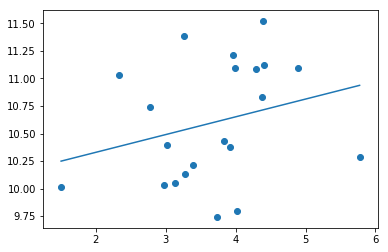

In [12]:
plt.plot(X_2017, Y_pred)
plt.scatter(X_2017, y_2017)

## Wrk with original data

In [13]:
data_.head()


,name,date,t,freq_sum,market,freq_sum_log10,market_log10
0,Какао,1998,1,16,6737791560,1.204120,9.828518
1,Какао,1999,2,44,4195377450,1.643453,9.622771
2,Какао,2000,3,31,3805830720,1.491362,9.580449
3,Какао,2001,4,111,4511574200,2.045323,9.654328
4,Какао,2002,5,208,7750779400,2.318063,9.889345


In [14]:
data_unscaled = data_[data_['t'] == 20].loc[:, ['freq_sum', 'market']]

0.14226663958817254

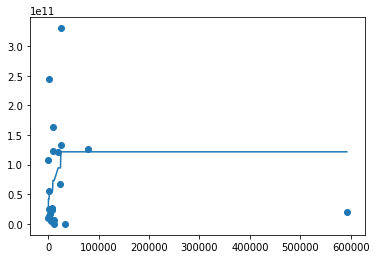

In [15]:
from sklearn.isotonic import IsotonicRegression

iso_model = IsotonicRegression(out_of_bounds='clip')

X_2017 = data_unscaled.sort_values(by='freq_sum')['freq_sum']
y_2017 = data_unscaled.sort_values(by='freq_sum')['market']
iso_model.fit(X_2017, y_2017)
plt.plot(X_2017, iso_model.predict(X_2017))
plt.scatter(X_2017, y_2017)
r2_score(y_2017, iso_model.predict(X_2017))

0.24736372468163526

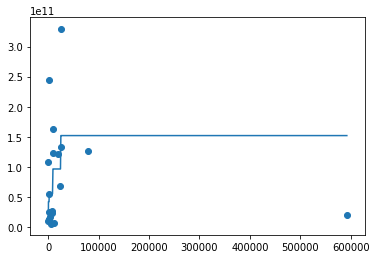

In [16]:
from sklearn.isotonic import IsotonicRegression

iso_model = IsotonicRegression(out_of_bounds='clip')
data_unscaled_s = data_2[data_2['t'] == 20].loc[:, ['freq_sum', 'market']]
# data_2 has crude oil silver removed

X_2017 = data_unscaled_s.sort_values(by='freq_sum')['freq_sum']
y_2017 = data_unscaled_s.sort_values(by='freq_sum')['market']
iso_model.fit(X_2017, y_2017)
plt.plot(X_2017, iso_model.predict(X_2017))
plt.scatter(X_2017, y_2017)
r2_score(y_2017, iso_model.predict(X_2017))

In [17]:
min(iso_model.predict(X_2017))

10229837223.0

In [18]:
max(iso_model.predict(X_2017))

151954405469.0

## Linear regression

In [19]:
linear_regressor = LinearRegression(fit_intercept = True)

X_2017 = data_unscaled.sort_values(by='freq_sum')['freq_sum']
y_2017 = data_unscaled.sort_values(by='freq_sum')['market']

fitt = linear_regressor.fit(np.array(X_2017).reshape(-1, 1), y_2017)
Y_pred = linear_regressor.predict(np.array(X_2017).reshape(-1, 1))
r2_score(np.array(y_2017).reshape(-1, 1), Y_pred)

0.008518604360141846

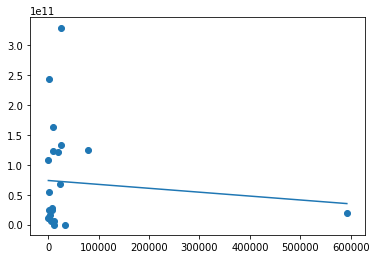

In [20]:
plt.plot(X_2017, Y_pred)
plt.scatter(X_2017, y_2017)

In [21]:
linear_regressor = LinearRegression(fit_intercept = True)
data_unscaled_s = data_2[data_2['t'] == 20].loc[:, ['freq_sum', 'market']]
# data_2 has crude oil silver removed

X_2017 = data_unscaled_s.sort_values(by='freq_sum')['freq_sum']
y_2017 = data_unscaled_s.sort_values(by='freq_sum')['market']

fitt = linear_regressor.fit(np.array(X_2017).reshape(-1, 1), y_2017)
Y_pred = linear_regressor.predict(np.array(X_2017).reshape(-1, 1))
r2_score(np.array(y_2017).reshape(-1, 1), Y_pred)

0.011283099635788219

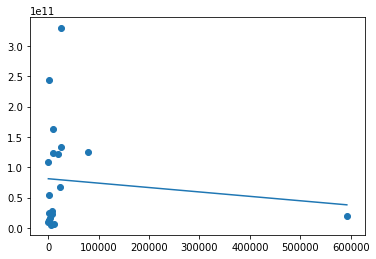

In [22]:
plt.plot(X_2017, Y_pred)
plt.scatter(X_2017, y_2017)

Выводы:

- Лучше в логарифмированием
- Лучше без нетипичных наблюдений

In [25]:
data_alt_1_values = data_[data_['t'] == 20].loc[:, ['name', 'freq_sum', 'market']]
data_alt_2_values = data_2[data_2['t'] == 20].loc[:, ['name', 'freq_sum', 'market']]
data_alt_1_logs = data_[data_['t'] == 20].loc[:, ['name', 'freq_sum_log10', 'market_log10']]
data_alt_2_logs = data_2[data_2['t'] == 20].loc[:, ['name', 'freq_sum_log10', 'market_log10']]
# data_2 has crude oil silver removed

In [28]:
unique_terms = unique_items = data_.loc[:, "name"].unique()
unique_terms

array(['Какао', 'Кокосовое масло', 'Арахис', 'Арахисовое масло',
       'Пальмовое масло', 'Соевые бобы', 'Соевое масло', 'Ячмень', 'Маис',
       'Сорго', 'Апельсин', 'Говядина', 'Хлопок', 'Алюминий', 'Медь',
       'Свинец', 'Олово', 'Никель', 'Цинк', 'Золото', 'Платина',
       'Серебро', 'Сырая нефть'], dtype=object)

In [ ]:
def term_list_sim_getter(target, unique_names_list):
    term_list = [target]
    term_list.extend(unique_names_list)
    results = []
    for term in term_list:
        for oppisite_term in term_list:
            if term == oppisite_term:
                pass
            try:
                url = f"http://api.ifora.hse.ru/vector_space/v0.2/w2v_2019_02_18/{term}/similarity/{opposite_term}"
                r = requests.get(url=url)
                data = r.json()
                results.append({"term": term, "opposite_term": opposite_term, "similarity": data["data"]["similarity"]})
            except Exception:
                pass
    return results

In [ ]:
def similarity(results):
    similarity = []
    

In [ ]:
# если очень хочешь усреднять модели во вложенном цикле, можешь исключить и item и item_:

train_ = data_[(data_.loc[:, "name"] != item_) & (data_.loc[:, "name"] != item)]

In [ ]:
# написал функцию, визуализирующую модель от двух признаков

def vis_mat(feats, target, image_size=20, target_range=None):
    # feats - признки: матрица или DataFrame 2 x n
    # target - целевой признак: массив длины n или матрица или DataFrame 1 x n
    # image_size - количество писелей по ширине и высоте в матрице
    # target_range - диапазон целевого признака, если None - считать автоматически

    feats = np.array(feats)
    assert feats.ndim == 2
    target = np.array(target).ravel()
    assert feats.shape == (len(target), 2)

    x_min, y_min = X_train_mat.min(axis=0)
    x_max, y_max = X_train_mat.max(axis=0)

    if target_range is None:
        target_range = np.array(target)
    target_range = np.array(target_range)
    target_range = target_range.min(), target_range.max()

    mat = np.zeros((mat_n, mat_n))
    for row, y in enumerate(np.linspace(y_max, y_min, mat_n)):
        for col, x in enumerate(np.linspace(x_min, x_max, mat_n)):
            nearest_idx = ((feats - np.array([x, y])) ** 2).sum(axis=1).argmin()
            val = target[nearest_idx]
            mat[row][col] = val

    plt.matshow(mat, vmin=target_range[0], vmax=target_range[1])


https://scikit-learn.org/stable/modules/model_persistence.html

но вообще было бы здорово иметь модели, которые
- могут работать с терминами на одном языке (если пользователю лень переводить)
- используют встречаемость за все годы в качестве входных данных (это должно немного уменьшить шум в данных по частотам встречаемости)

https://scikit-learn.org/stable/modules/generated/sklearn.isotonic.IsotonicRegression.html

https://github.com/alexfields/multiisotonic